**Name:** Pratibha Gupta \
**Batch:** Afternoon, ML-14 \
**Data:** Airline data

1)DailyTotalFemaleBirths
2)airline_passengers


Implement analysis on the above mentioned data. 
   a) SMA \
   b) WMA \
   c) single exponential smoothing  \
   d) double exponential smoothing   \
   e) Triple exponential smoothing   \
   f) check if data is stationary or not. If data is not stationary then implement differencing technique to make data stationary.    \
Split the data into train and test and check the accuracy of predicted/forecasted data.  \
Submit in PDF and .ipynb format

In [1]:
## Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import airline data.
airline_data=pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
airline_data.head(5)

,Thousands of Passengers,Unnamed: 2,Unnamed: 3,Unnamed: 4
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,NaN,NaN,NaN
1949-04-01,129,NaN,NaN,NaN
1949-05-01,121,NaN,NaN,NaN


In [3]:
col=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
air_data=airline_data.drop(columns=col,axis=1) ## Drop unnnecessary columns.
air_data.head(2)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118


In [4]:
air_data.shape    ## Dimension of the data

(144, 1)

## Checking Stationarity

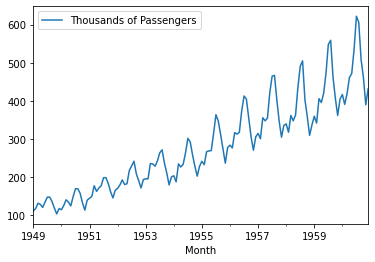

In [5]:
airline_data.plot()
plt.show()

- **Increasing trend is present. data is not stationary.**

In [8]:
from statsmodels.tsa.stattools import adfuller, acf,pacf
data_test = adfuller(air_data['Thousands of Passengers'], autolag='AIC')

dfoutput = pd.Series(data_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in data_test[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


- **p-value is high, that concludes data is not stationary.**


### Decomposition

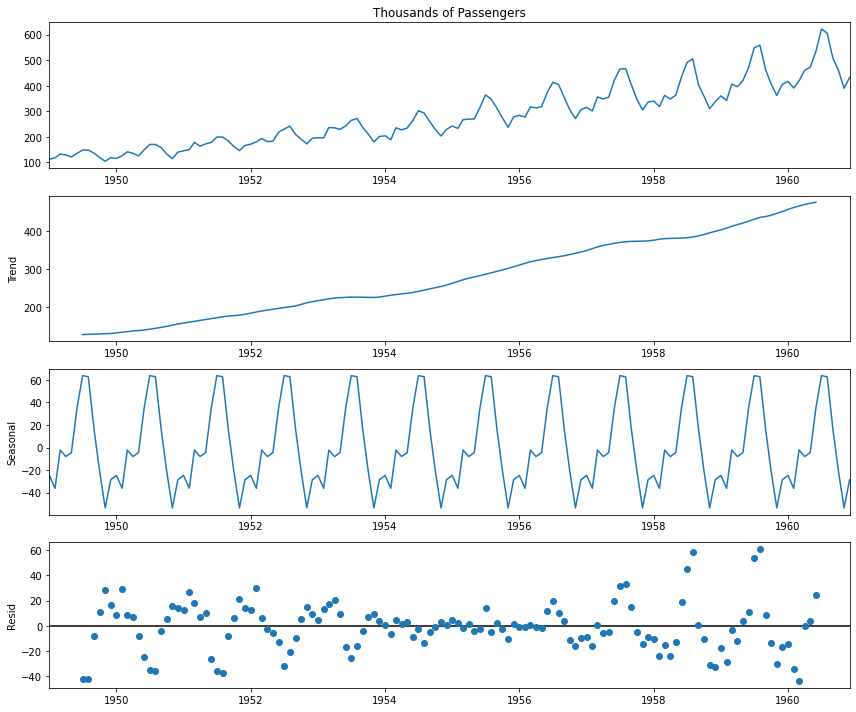

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pylab import rcParams
rcParams['figure.figsize']=12,10
decomposition=seasonal_decompose(air_data['Thousands of Passengers'],model='additive')
fig=decomposition.plot()
plt.tight_layout()
plt.show()

- **Seasonality and Trend is present in the data at fixed interval of time**

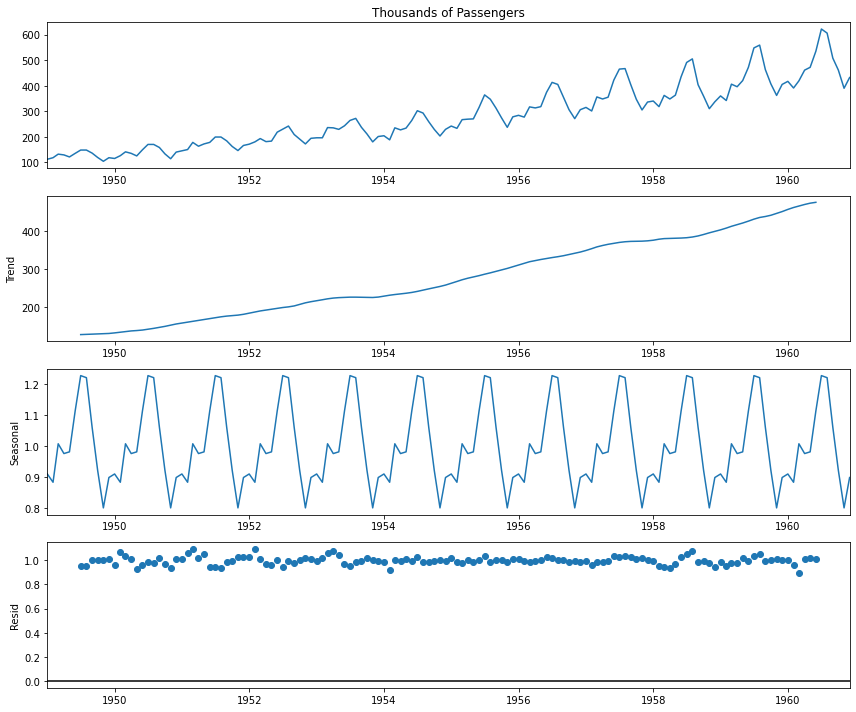

In [10]:
decomposition=seasonal_decompose(air_data['Thousands of Passengers'],model='multiplicative')
fig=decomposition.plot()
plt.tight_layout()
plt.show()

### Simple Moving Average and Weighted Moving Average

In [11]:
air_data['3_month-SMA'] = air_data['Thousands of Passengers'].rolling(window=3).mean()
air_data['6_month-SMA'] = air_data['Thousands of Passengers'].rolling(window=6).mean()
air_data['12_month-SMA'] = air_data['Thousands of Passengers'].rolling(window=12).mean()
air_data.head(4)

,Thousands of Passengers,3_month-SMA,6_month-SMA,12_month-SMA
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,120.666667,NaN,NaN
1949-04-01,129,126.333333,NaN,NaN


In [12]:
air_data['3_month-wma'] = air_data['Thousands of Passengers'].ewm(span=3,adjust=False).mean()
air_data['6_month-wma'] = air_data['Thousands of Passengers'].ewm(span=6,adjust=False).mean()
air_data['12_month-wma'] = air_data['Thousands of Passengers'].ewm(span=12,adjust=False).mean()
air_data.head(4)

,Thousands of Passengers,3_month-SMA,6_month-SMA,12_month-SMA,3_month-wma,6_month-wma,12_month-wma
Month,,,,,,,
1949-01-01,112,NaN,NaN,NaN,112.00,112.000000,112.000000
1949-02-01,118,NaN,NaN,NaN,115.00,113.714286,112.923077
1949-03-01,132,120.666667,NaN,NaN,123.50,118.938776,115.857988
1949-04-01,129,126.333333,NaN,NaN,126.25,121.813411,117.879836


- **Simple Exponential Smoothing/ Double Exponential Smoothing/ Triple Expoenential Smoothing**

    - Triple exponential Smoothing will be useful because 'Trend' and 'seasonality both are present in the data, but just to understand and to learn the other exponential method, I'm applying Simple and double exponential method also.

In [13]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

air_data['SES']=SimpleExpSmoothing(air_data['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
air_data.head()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


,Thousands of Passengers,3_month-SMA,6_month-SMA,12_month-SMA,3_month-wma,6_month-wma,12_month-wma,SES
Month,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,112.000,112.000000,112.000000,112.000000
1949-02-01,118,NaN,NaN,NaN,115.000,113.714286,112.923077,112.923077
1949-03-01,132,120.666667,NaN,NaN,123.500,118.938776,115.857988,115.857988
1949-04-01,129,126.333333,NaN,NaN,126.250,121.813411,117.879836,117.879836
1949-05-01,121,127.333333,NaN,NaN,123.625,121.581008,118.359861,118.359861


In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

air_data['DES'] = ExponentialSmoothing(air_data['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
air_data.head()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


,Thousands of Passengers,3_month-SMA,6_month-SMA,12_month-SMA,3_month-wma,6_month-wma,12_month-wma,SES,DES
Month,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,112.000,112.000000,112.000000,112.000000,113.474828
1949-02-01,118,NaN,NaN,NaN,115.000,113.714286,112.923077,112.923077,119.464366
1949-03-01,132,120.666667,NaN,NaN,123.500,118.938776,115.857988,115.857988,133.477561
1949-04-01,129,126.333333,NaN,NaN,126.250,121.813411,117.879836,117.879836,130.543312
1949-05-01,121,127.333333,NaN,NaN,123.625,121.581008,118.359861,118.359861,122.528126


In [15]:
air_data['DESmul12'] = ExponentialSmoothing(air_data['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
air_data.head()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


,Thousands of Passengers,3_month-SMA,6_month-SMA,12_month-SMA,3_month-wma,6_month-wma,12_month-wma,SES,DES,DESmul12
Month,,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,112.000,112.000000,112.000000,112.000000,113.474828,114.978251
1949-02-01,118,NaN,NaN,NaN,115.000,113.714286,112.923077,112.923077,119.464366,121.191659
1949-03-01,132,120.666667,NaN,NaN,123.500,118.938776,115.857988,115.857988,133.477561,135.802180
1949-04-01,129,126.333333,NaN,NaN,126.250,121.813411,117.879836,117.879836,130.543312,132.657709
1949-05-01,121,127.333333,NaN,NaN,123.625,121.581008,118.359861,118.359861,122.528126,124.213566


In [16]:
air_data['TES12'] = ExponentialSmoothing(air_data['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
air_data.head()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


,Thousands of Passengers,3_month-SMA,6_month-SMA,12_month-SMA,3_month-wma,6_month-wma,12_month-wma,SES,DES,DESmul12,TES12
Month,,,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,112.000,112.000000,112.000000,112.000000,113.474828,114.978251,112.001172
1949-02-01,118,NaN,NaN,NaN,115.000,113.714286,112.923077,112.923077,119.464366,121.191659,120.168193
1949-03-01,132,120.666667,NaN,NaN,123.500,118.938776,115.857988,115.857988,133.477561,135.802180,134.698694
1949-04-01,129,126.333333,NaN,NaN,126.250,121.813411,117.879836,117.879836,130.543312,132.657709,131.376310
1949-05-01,121,127.333333,NaN,NaN,123.625,121.581008,118.359861,118.359861,122.528126,124.213566,124.628035


In [17]:
air_data['TESmul12'] = ExponentialSmoothing(air_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
air_data.head()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


,Thousands of Passengers,3_month-SMA,6_month-SMA,12_month-SMA,3_month-wma,6_month-wma,12_month-wma,SES,DES,DESmul12,TES12,TESmul12
Month,,,,,,,,,,,,
1949-01-01,112,NaN,NaN,NaN,112.000,112.000000,112.000000,112.000000,113.474828,114.978251,112.001172,111.597879
1949-02-01,118,NaN,NaN,NaN,115.000,113.714286,112.923077,112.923077,119.464366,121.191659,120.168193,118.844235
1949-03-01,132,120.666667,NaN,NaN,123.500,118.938776,115.857988,115.857988,133.477561,135.802180,134.698694,133.334951
1949-04-01,129,126.333333,NaN,NaN,126.250,121.813411,117.879836,117.879836,130.543312,132.657709,131.376310,127.901291
1949-05-01,121,127.333333,NaN,NaN,123.625,121.581008,118.359861,118.359861,122.528126,124.213566,124.628035,120.978657


### ACF-PACF plot

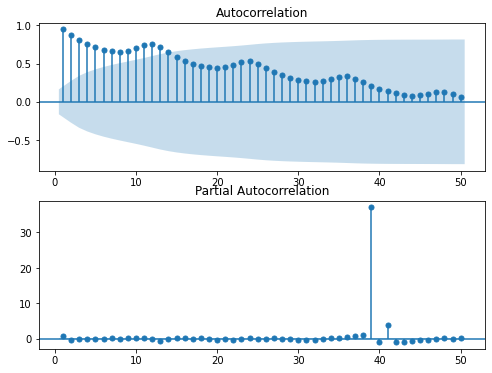

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(air_data['Thousands of Passengers'], lags=50,alpha=0.05, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(air_data['Thousands of Passengers'], lags=50,alpha=0.05, zero=False, ax=ax2)
plt.show()


Autocorrelation: If the lag plot gives a linear plot, then it means the autocorrelation is present in the data, whether there is positive autocorrelation or negative that depends upon the slope of the line of the dataset. If more data is concentrated on the diagonal in lag plot, it means there is a strong autocorrelation.

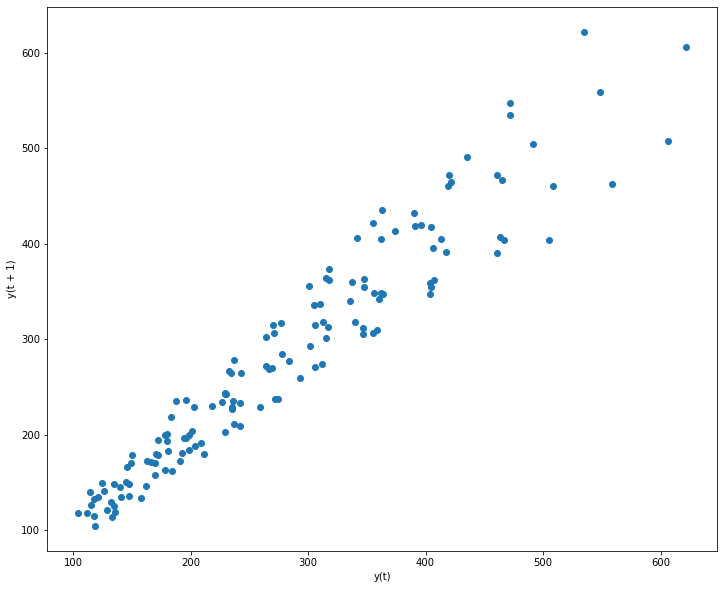

In [19]:
pd.plotting.lag_plot(air_data['Thousands of Passengers']);

- Above plot Shows that Autocorrleation is present in the data as observation points are linearly increasing in positive direction.

In [20]:
from pmdarima import auto_arima
## Without Seasonality
stepwise_fit = auto_arima(air_data['Thousands of Passengers'], start_p=1, start_q=1,
                          max_p=6, max_q=3, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Sat, 21 Aug 2021   AIC                           1365.825
Time:                        20:44:54   BIC                           1389.528
Sample:                             0   HQIC                          1375.457
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9069      0.094      9.657      0.000       0.723       1.091
ma.L2         -0.5590      0.145     -3.866      0.000      -0.842      -0.276
ma.L3         -0.7385      0.109     -6.778      0.000      -0.952      -0.525
sigma2       724.1727     85.616      8.458      0.000     556.369     891.976
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- Best ARIMA Model is with order p=4, d=1,q=3, with absence of seasonality. 

In [21]:
## With Seasonality
stepwise_fit = auto_arima(air_data['Thousands of Passengers'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=12,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.98 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.29 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.58 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.45 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.50 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.25 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.61 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.78 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.48 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.17 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=3.26 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Sat, 21 Aug 2021   AIC                           1019.178
Time:                                     20:45:09   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

p: Trend autoregressive order=0 \
d: Trend difference order=1  \
q: Trend moving average order=1  \

P: Seasonal autoregressive order=2   \
D: Seasonal difference order=1  \
Q: Seasonal moving average order=0  \
m: The number of time steps for a single seasonal period=12   \

In [22]:
Train=air_data['Thousands of Passengers'].iloc[:-50]
test=air_data['Thousands of Passengers'].iloc[-50:]
print(Train.shape)
print(test.shape)

(94,)
(50,)


In [23]:
d= ARIMA(Train,order=(4,1,3))
d=d.fit().summary()
d

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                 
=====================================================================================
Dep. Variable:     D.Thousands of Passengers   No. Observations:                   93
Model:                        ARIMA(4, 1, 3)   Log Likelihood                -397.490
Method:                              css-mle   S.D. of innovations             16.459
Date:                       Sat, 21 Aug 2021   AIC                            812.980
Time:                               20:45:11   BIC                            835.773
Sample:                           02-01-1949   HQIC                           822.183
                                - 10-01-1956                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               2.3349      0.151     15.462      0.000       2.039       2.631
ar.L1.D.Thousands of Passengers     0.2953      0.091      3.236      0.001       0.116       0.474
ar.L2.D.Thousands of Passengers    -0.4514      0.068     -6.668      0.000      -0.584      -0.319
ar.L3.D.Thousands of Passengers     0.5915      0.067      8.852      0.000       0.461       0.722
ar.L4.D.Thousands of Passengers    -0.6000      0.088     -6.855      0.000      -0.772      -0.428
ma.L1.D.Thousands of Passengers    -0.2014      0.079     -2.560      0.010      -0.355      -0.047
ma.L2.D.Thousands of Passengers     0.2014      0.081      2.495      0.013       0.043       0.360
ma.L3.D.Thousands of Passengers    -1.0000      0.078    -12.865      0.000      -1.152      -0.848
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4835           -0.8997j            1.0214           -0.3285
AR.2           -0.4835           +0.8997j            1.0214            0.3285
AR.3            0.9764           -0.8026j            1.2639           -0.1095
AR.4            0.9764           +0.8026j            1.2639            0.1095
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.3993           -0.9168j            1.0000           -0.3154
MA.3           -0.3993           +0.9168j            1.0000            0.3154
-----------------------------------------------------------------------------
"""

In [26]:
import statsmodels.api as sm
ds= sm.tsa.statespace.SARIMAX(Train,order=(0,1,1),seasonal_order=(2,1,0,12))
ds=ds.fit()
ds.summary()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   94
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -298.398
Date:                             Sat, 21 Aug 2021   AIC                            604.795
Time:                                     20:45:45   BIC                            614.373
Sample:                                 01-01-1949   HQIC                           608.638
                                      - 10-01-1956                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2760      0.105     -2.618      0.009      -0.483      -0.069
ar.S.L12      -0.2074      0.112     -1.845      0.065      -0.428       0.013
ar.S.L24       0.0613      0.127      0.481      0.630      -0.188       0.311
sigma2        91.8783     15.454      5.945      0.000      61.589     122.168
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.16
Prob(Q):                              0.98   Prob(JB):                         0.34
Heteroskedasticity (H):               1.87   Skew:                             0.38
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- As there are seasonality is Present in The data, we will go for SARIMA Model as it will provide better model than ARIMA, because ARIMA don't treat seasonality error.
 
**Best Model**: SARIMAX(0,1,1)(2,1,0)[12]

- As in the data seasonality and trend both are present SARIMAX Model will be prefered and best model for the data.

In [27]:
start=len(Train)
end=len(Train)+len(test)-1
pred=ds.predict(start=start,end=end,typ='levels').rename('SARIMA(0,1,1)(2,1,0)[12] Predictions')
print(pred)

1956-11-01    276.030181
1956-12-01    314.226201
1957-01-01    322.290904
1957-02-01    315.305348
1957-03-01    353.264079
1957-04-01    351.121413
1957-05-01    354.924065
1957-06-01    409.562680
1957-07-01    451.310803
1957-08-01    440.953985
1957-09-01    394.003212
1957-10-01    346.793779
1957-11-01    314.691686
1957-12-01    354.388843
1958-01-01    361.596207
1958-02-01    354.730280
1958-03-01    393.480178
1958-04-01    390.584487
1958-05-01    394.880680
1958-06-01    450.476034
1958-07-01    491.041163
1958-08-01    481.724883
1958-09-01    433.222117
1958-10-01    384.966945
1958-11-01    353.738054
1958-12-01    392.952004
1959-01-01    400.463744
1959-02-01    393.573895
1959-03-01    432.034576
1959-04-01    429.408915
1959-05-01    433.529351
1959-06-01    488.842839
1959-07-01    529.821776
1959-08-01    520.145220
1959-09-01    472.151243
1959-10-01    424.222709
1959-11-01    392.682008
1959-12-01    432.088198
1960-01-01    439.484255
1960-02-01    432.606701


<AxesSubplot:xlabel='Month'>

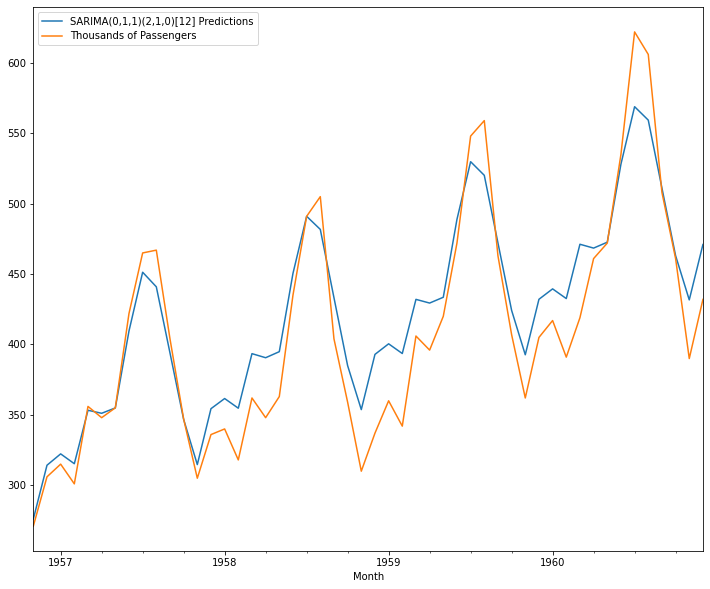

In [28]:
pred.plot(legend=True)
test.plot(legend=True)

In [35]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test, pred)
print(f'SARIMA(0,1,1)(2,1,0)[12] MSE Error: {error:11.10}')

SARIMA(0,1,1)(2,1,0)[12] MSE Error: 773.9247226


In [36]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test, pred)
print(f'SARIMA(0,1,1)(2,1,0)[12] RMSE Error: {error:11.10}')

SARIMA(0,1,1)(2,1,0)[12] RMSE Error: 27.81950256


In [37]:
model = sm.tsa.statespace.SARIMAX(airline_data['Thousands of Passengers'],order=(0,1,1),seasonal_order=(2,1,0,12))
results = model.fit()
forecast = results.predict(len(airline_data),len(airline_data)+48,typ='levels').rename('SARIMA(0,1,1)(2,1,0)[12] Forecast') #Prediction for 4years

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


[Text(0.5, 0, ''), Text(0, 0.5, 'Frequency')]

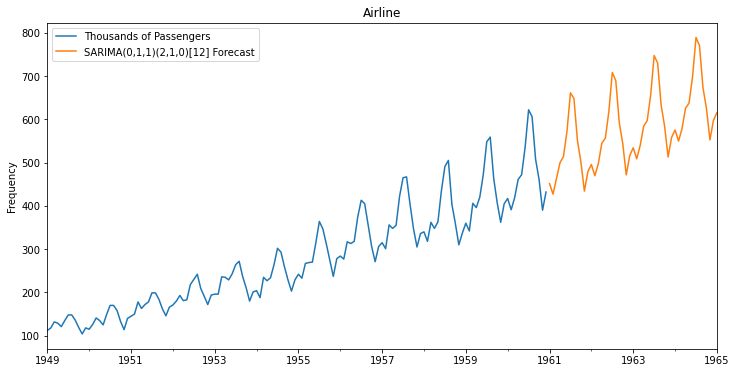

In [38]:
# Plot predictions against known values (forecast for 4 years).
title = 'Airline'
ylabel='Frequency'
xlabel=''

ax = airline_data['Thousands of Passengers'].plot(legend=True,figsize=(12,6),title=title)
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

Trend has increased in upcoming years as per the seasons.

https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/#:~:text=In%20the%20SARIMAX%20models%20parameter%2C%20we%20need%20to,we%20are%20required%20to%20provide%20four%20numbers.%20

https://neptune.ai/blog/arima-sarima-real-world-time-series-forecasting-guide